In [1]:
import numpy as np
import matplotlib.pyplot as plt

import struct
from tqdm import tqdm
import math as m
import h5py

In [2]:
import pandas as pd
import sys, os

sys.path.append("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/MULE")

from packs.core import io as io

In [6]:
nRUN1 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN1_dig1-DT5740-915_CH2_20250403143256-20.h5", samples = 3126)
nRUN2 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN2_dig1-DT5740-915_CH2_20250403145441-21.h5", samples = 3126)
nRUN3 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN3_dig1-DT5740-915_CH2_20250403152735-23.h5", samples = 3126)
nRUN4 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN4_dig1-DT5740-915_CH2_20250403154730-24.h5", samples = 3126)
nRUN5 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN5_dig1-DT5740-915_CH2_20250403160615-25.h5", samples = 3126)

In [14]:
# bs = baseline subtracted

nRUN1_bs = nRUN1.copy(deep=True)
nRUN2_bs = nRUN2.copy(deep=True)
nRUN3_bs = nRUN3.copy(deep=True)
nRUN4_bs = nRUN4.copy(deep=True)
nRUN5_bs = nRUN5.copy(deep=True)
nRUN_bs = [nRUN1_bs, nRUN2_bs, nRUN3_bs, nRUN4_bs, nRUN5_bs]

for nRUN in nRUN_bs:
    for i in range(len(nRUN.rwf)):
        baseline = np.mean(nRUN.rwf[i][50:100])
        nRUN.at[i, 'rwf'] = nRUN.rwf[i] - baseline
    #nRUN_avg = np.mean(nRUN.rwf, axis = 0)
    #plt.plot(nRUN_avg)
    #plt.plot(50, nRUN_avg[50], "ro")
    #plt.plot(100, nRUN_avg[100], "ro")
    #plt.show()

In [16]:
nRUN1_pressure = np.genfromtxt("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN1_pressure.csv", delimiter=",", skip_header=1)
nRUN2_pressure = np.genfromtxt("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN2_pressure.csv", delimiter=",", skip_header=1)
nRUN3_pressure = np.genfromtxt("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN3_pressure.csv", delimiter=",", skip_header=1)
nRUN4_pressure = np.genfromtxt("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN4_pressure.csv", delimiter=",", skip_header=1)
nRUN5_pressure = np.genfromtxt("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/testing0304/nRUN5_pressure.csv", delimiter=",", skip_header=1)

In [33]:
print(len(nRUN1_pressure[:,1]))

25


In [ ]:
def integrate_nRUN(nRUN_bs, nRUN_pressure, run):

    #rois = baseline_subtracted.copy(deep=True)

    #for i in range(len(rois.rwf)):
    #    peak = np.argmax(baseline_subtracted.rwf[i])
    #    for j in range(len(baseline_subtracted.rwf[i]) - peak):
    #        roi_end = peak + j
    #        if baseline_subtracted.rwf[i][roi_end] < 0:
    #            roi_end = peak + j
    #            break
    #    roi_start = peak - 2*(roi_end - peak)
    #    rois.at[i, 'rwf'] = baseline_subtracted.rwf[i][roi_start:roi_end]

    
    interval = 50.016*10**-6 / len(nRUN_bs.rwf[0])

    areas = np.empty((len(nRUN_bs.rwf), len(nRUN_pressure[:,1])))

    start = 0

    for k in range(len(nRUN_pressure[:,1])):
        window = int(nRUN_pressure[:,1][k])
        nRUN_window = nRUN_bs.rwf[start:window]
        for i in range(len(nRUN_window)):
            for j in range(len(nRUN_window.iloc[i])-1):
                if (nRUN_window.iloc[i][j] + nRUN_window.iloc[i][j+1]) > 0:
                    areas[i] += (nRUN_window.iloc[i][j] + nRUN_window.iloc[i][j+1])/2  * interval
    
        plt.plot(areas[:(window-start), k]) #check this indexing - graphs don't make sense (always go from high to low from each window)
        plt.xlabel("Event number")
        plt.ylabel("Charge released (mVs)")
        plt.title("Charge released per event - " + run)
        plt.show()

        hist = plt.hist(areas[:(window-start), k], bins=100)
        plt.xlabel("Charged released (mVs)")
        plt.ylabel("Frequency")
        plt.title(run)
        plt.show()

        start = int(window)

    return areas

#add separate function for plotting - integrate once (overnight), write out areas (save) and then can adjust plots easily


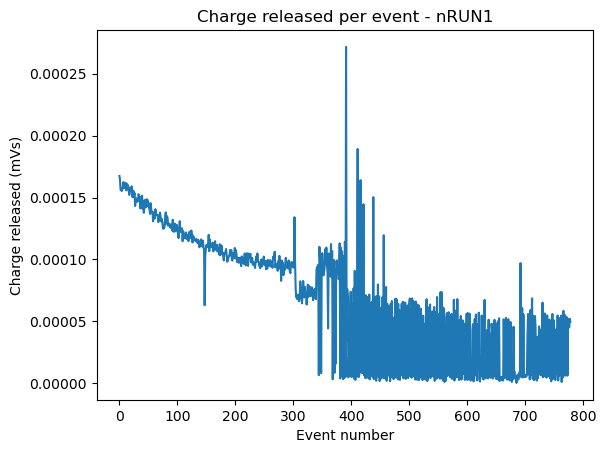

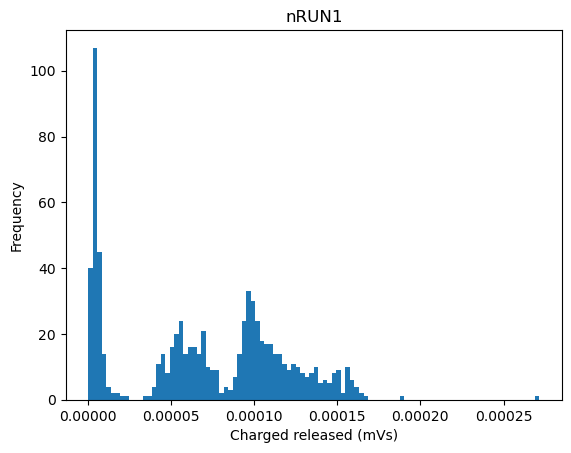

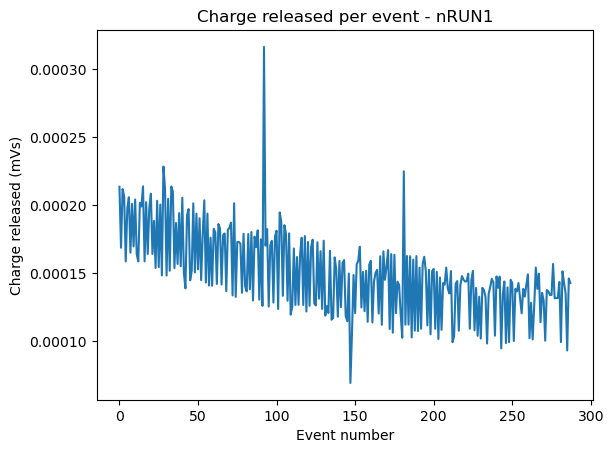

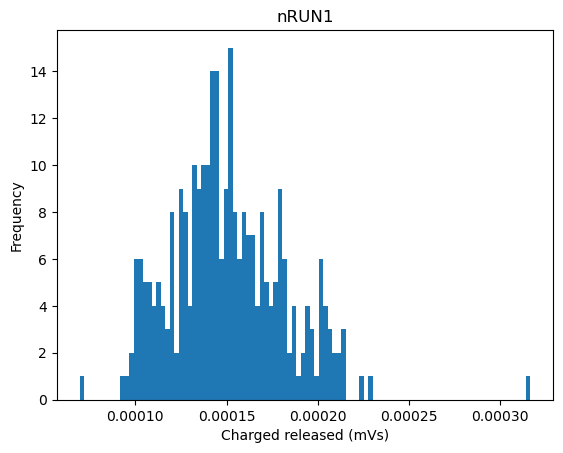

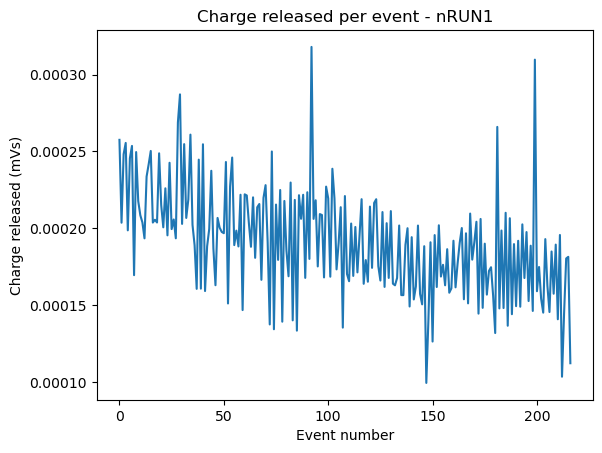

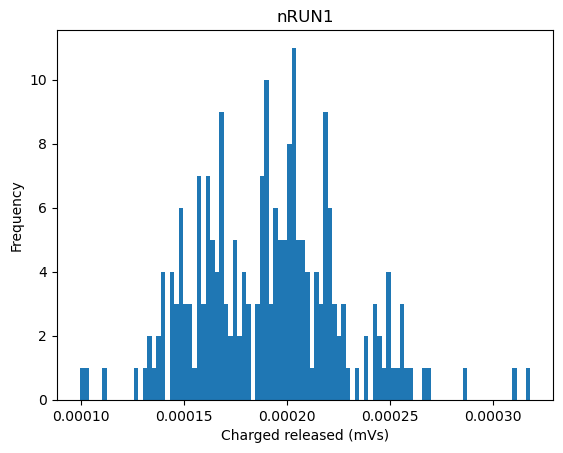

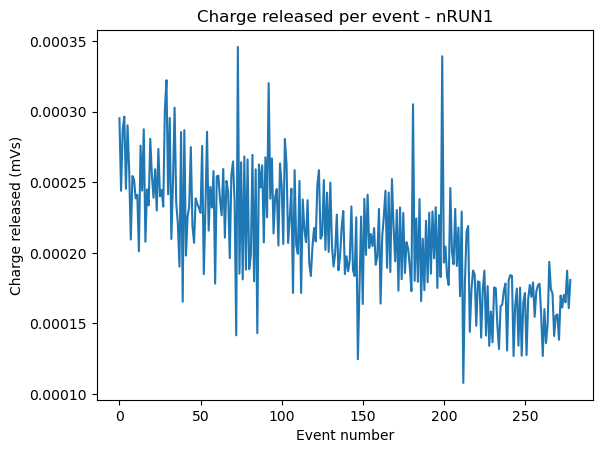

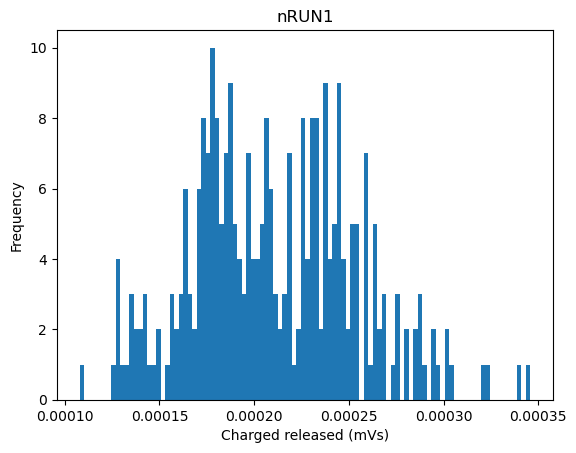

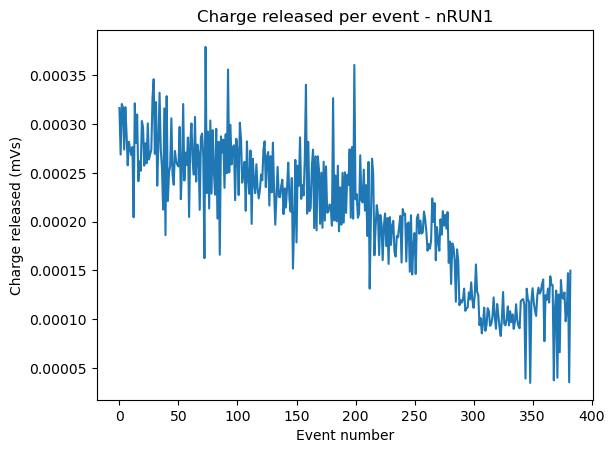

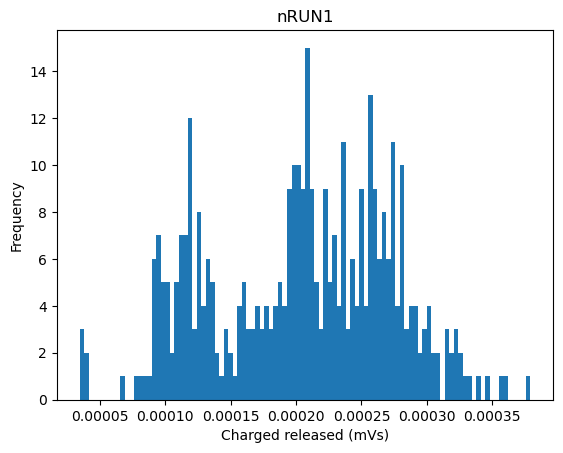

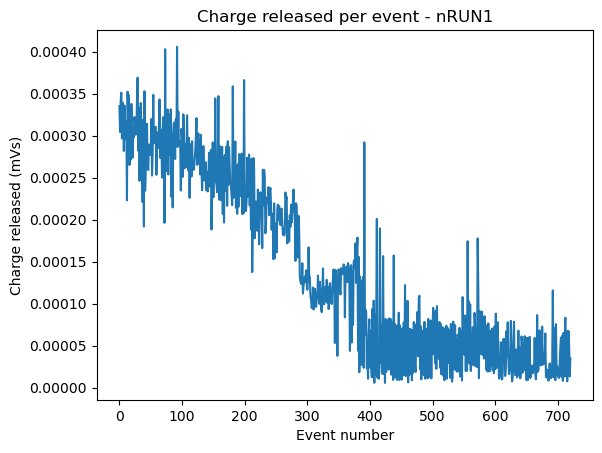

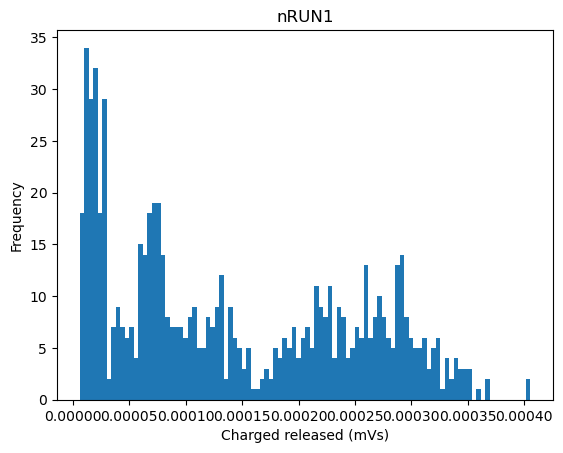

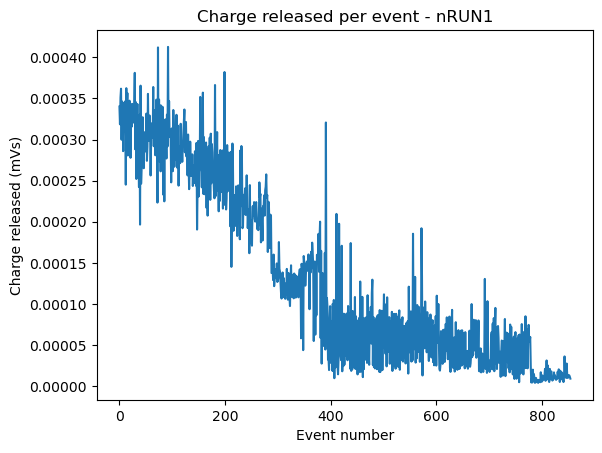

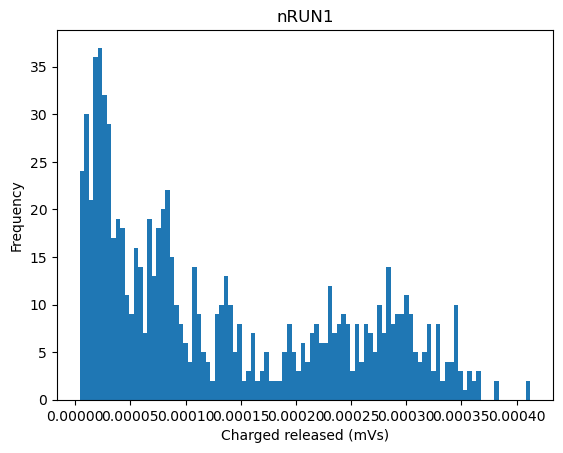

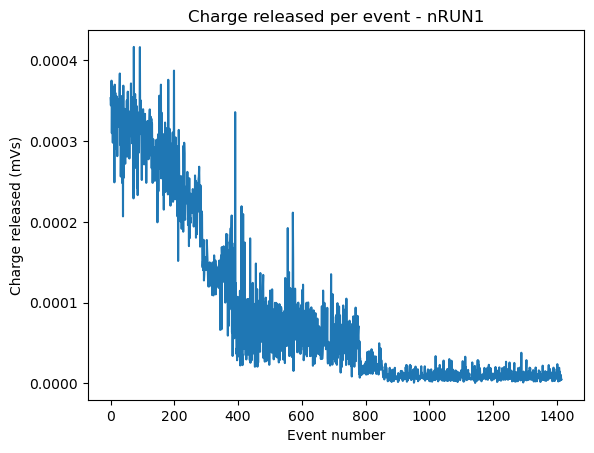

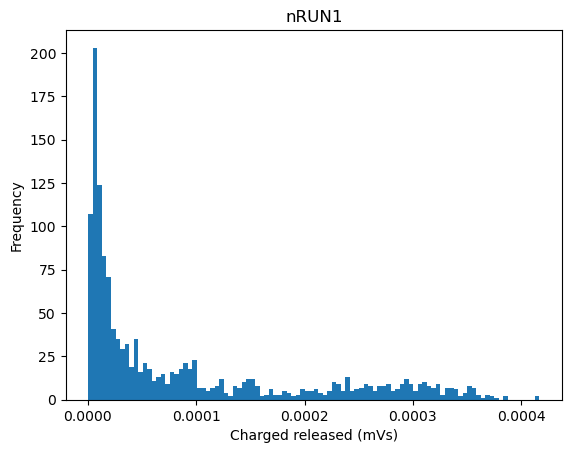

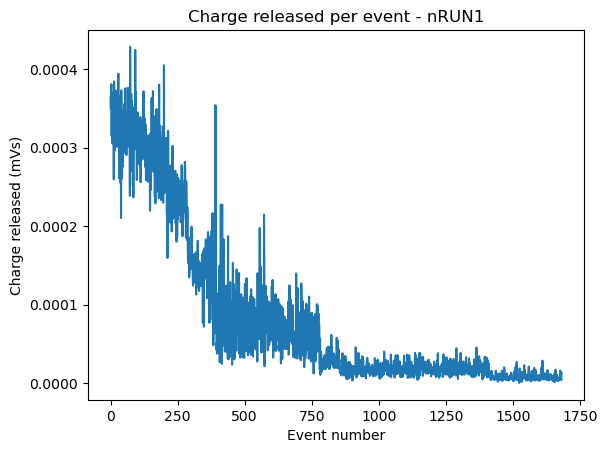

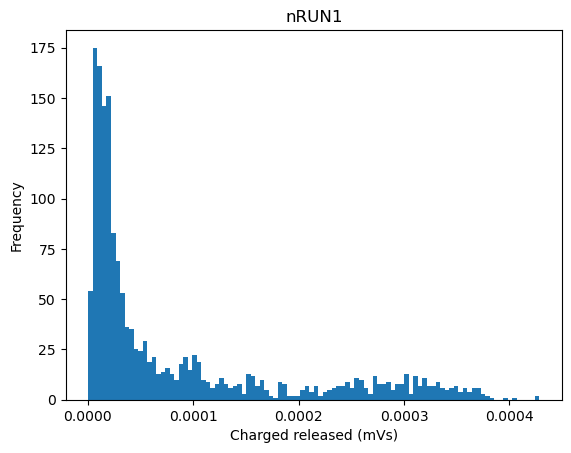

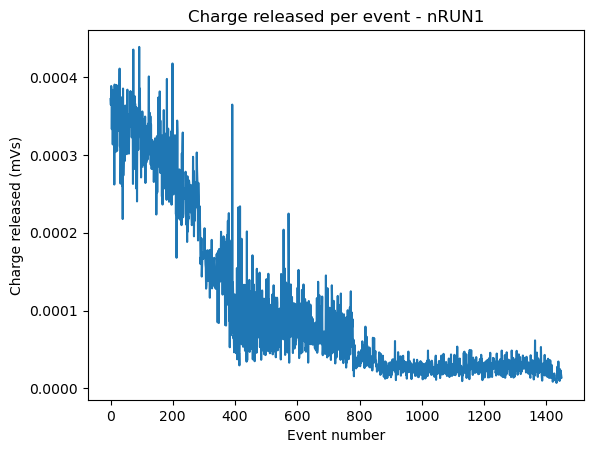

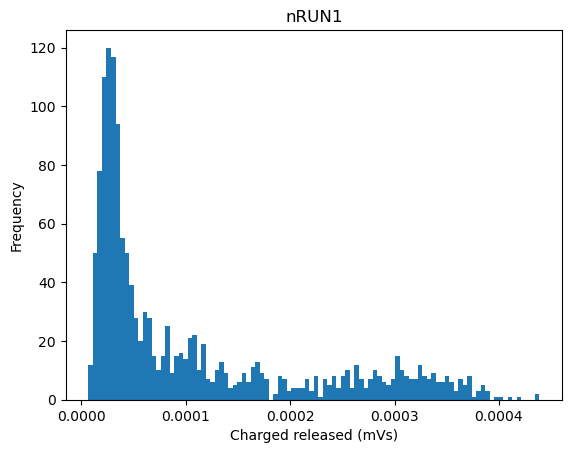

KeyboardInterrupt: 

In [66]:
integrate_nRUN(nRUN1_bs, nRUN1_pressure, "nRUN1")